In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("sales_data_sample.csv")
df.head()

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,STATUS,QTR_ID,MONTH_ID,YEAR_ID,...,ADDRESSLINE1,ADDRESSLINE2,CITY,STATE,POSTALCODE,COUNTRY,TERRITORY,CONTACTLASTNAME,CONTACTFIRSTNAME,DEALSIZE
0,10107,30,95.70,2,2871.00,2/24/2003 0:00,Shipped,1,2,2003,...,897 Long Airport Avenue,NaN,NYC,NY,10022,USA,NaN,Yu,Kwai,Small
1,10121,34,81.35,5,2765.90,5/7/2003 0:00,Shipped,2,5,2003,...,59 rue de l'Abbaye,NaN,Reims,NaN,51100,France,EMEA,Henriot,Paul,Small
2,10134,41,94.74,2,3884.34,7/1/2003 0:00,Shipped,3,7,2003,...,27 rue du Colonel Pierre Avia,NaN,Paris,NaN,75508,France,EMEA,Da Cunha,Daniel,Medium
3,10145,45,83.26,6,3746.70,8/25/2003 0:00,Shipped,3,8,2003,...,78934 Hillside Dr.,NaN,Pasadena,CA,90003,USA,NaN,Young,Julie,Medium
4,10159,49,100.00,14,5205.27,10/10/2003 0:00,Shipped,4,10,2003,...,7734 Strong St.,NaN,San Francisco,CA,NaN,USA,NaN,Brown,Julie,Medium


In [3]:
df.describe()

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,QTR_ID,MONTH_ID,YEAR_ID,MSRP
count,2823.000000,2823.000000,2823.000000,2823.000000,2823.000000,2823.000000,2823.000000,2823.00000,2823.000000
mean,10258.725115,35.092809,83.658544,6.466171,3553.889072,2.717676,7.092455,2003.81509,100.715551
std,92.085478,9.741443,20.174277,4.225841,1841.865106,1.203878,3.656633,0.69967,40.187912
min,10100.000000,6.000000,26.880000,1.000000,482.130000,1.000000,1.000000,2003.00000,33.000000
25%,10180.000000,27.000000,68.860000,3.000000,2203.430000,2.000000,4.000000,2003.00000,68.000000
50%,10262.000000,35.000000,95.700000,6.000000,3184.800000,3.000000,8.000000,2004.00000,99.000000
75%,10333.500000,43.000000,100.000000,9.000000,4508.000000,4.000000,11.000000,2004.00000,124.000000
max,10425.000000,97.000000,100.000000,18.000000,14082.800000,4.000000,12.000000,2005.00000,214.000000


In [4]:
df.isnull().sum()

ORDERNUMBER            0
QUANTITYORDERED        0
PRICEEACH              0
ORDERLINENUMBER        0
SALES                  0
ORDERDATE              0
STATUS                 0
QTR_ID                 0
MONTH_ID               0
YEAR_ID                0
PRODUCTLINE            0
MSRP                   0
PRODUCTCODE            0
CUSTOMERNAME           0
PHONE                  0
ADDRESSLINE1           0
ADDRESSLINE2        2521
CITY                   0
STATE               1486
POSTALCODE            76
COUNTRY                0
TERRITORY           1074
CONTACTLASTNAME        0
CONTACTFIRSTNAME       0
DEALSIZE               0
dtype: int64

In [5]:
features = ["QUANTITYORDERED", "ORDERLINENUMBER"]
x = df[features]
x.head()

,QUANTITYORDERED,ORDERLINENUMBER
0,30,2
1,34,5
2,41,2
3,45,6
4,49,14


In [6]:
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
# feat = ["QUANTITYORDERED", "ORDERLINENUMBER"]
x[features] = ss.fit_transform(x[features])

x.head()

<ipython-input-6-3905703fa57f>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x[features] = ss.fit_transform(x[features])
D:\anaconda\files\lib\site-packages\pandas\core\indexing.py:1738: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value[:, i].tolist(), pi)


,QUANTITYORDERED,ORDERLINENUMBER
0,-0.522891,-1.057059
1,-0.112201,-0.347015
2,0.606505,-1.057059
3,1.017195,-0.110334
4,1.427884,1.783116


In [7]:
x.describe()

,QUANTITYORDERED,ORDERLINENUMBER
count,2.823000e+03,2.823000e+03
mean,3.282296e-16,8.266698e-17
std,1.000177e+00,1.000177e+00
min,-2.987028e+00,-1.293740e+00
25%,-8.309080e-01,-8.203775e-01
50%,-9.528928e-03,-1.103339e-01
75%,8.118502e-01,5.997098e-01
max,6.356159e+00,2.729841e+00


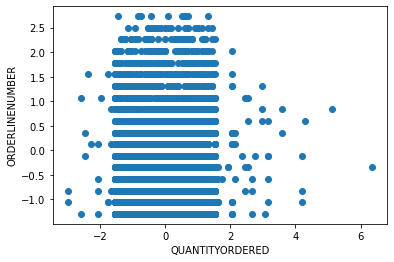

In [8]:
plt.scatter(x["QUANTITYORDERED"], x["ORDERLINENUMBER"])
plt.xlabel("QUANTITYORDERED")
plt.ylabel("ORDERLINENUMBER")
plt.show()

In [9]:
from sklearn.cluster import KMeans

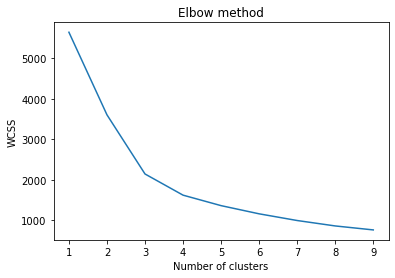

In [10]:
# sum of distances
wcss = []

for i in range(1, 10):
    model = KMeans(n_clusters=i, random_state=0)
    model.fit(x)
    wcss.append(model.inertia_)
    
plt.plot(range(1,10), wcss)
plt.title("Elbow method")
plt.xlabel("Number of clusters")
plt.ylabel("WCSS")
plt.show()

In [11]:
wcss

[5646.000000000004,
 3605.018295054714,
 2142.565654808148,
 1619.060674065545,
 1359.9293236680298,
 1157.7266247930404,
 992.1739381839307,
 858.1951208011162,
 759.9790753442295]

In [12]:
model = KMeans(n_clusters=3, random_state=0)
y_pred = model.fit_predict(x)

In [13]:
y_pred

array([2, 2, 1, ..., 1, 2, 1])

In [14]:
x["cluster"] = y_pred
x.head()

<ipython-input-14-c3f554bb8687>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x["cluster"] = y_pred


,QUANTITYORDERED,ORDERLINENUMBER,cluster
0,-0.522891,-1.057059,2
1,-0.112201,-0.347015,2
2,0.606505,-1.057059,1
3,1.017195,-0.110334,1
4,1.427884,1.783116,0


In [15]:
x["cluster"].unique()

array([2, 1, 0])

In [29]:
print(model.cluster_centers_)
print(model.cluster_centers_[:, 0])

[[-0.08473482  1.31306997]
 [ 0.94387222 -0.49799727]
 [-0.84008047 -0.51321484]]
[-0.08473482  0.94387222 -0.84008047]


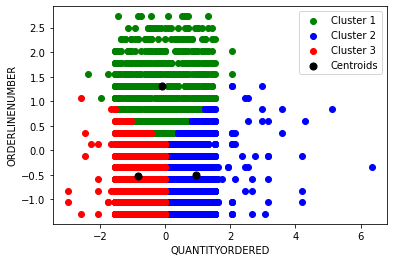

In [35]:
x0 = x[x["cluster"] == 0]
x1 = x[x["cluster"] == 1]
x2 = x[x["cluster"] == 2]
# x3 = x[x["cluster"] == 3]


plt.scatter(x0["QUANTITYORDERED"], x0["ORDERLINENUMBER"], color="green", label="Cluster 1")
plt.scatter(x1["QUANTITYORDERED"], x1["ORDERLINENUMBER"], color="blue", label="Cluster 2")
plt.scatter(x2["QUANTITYORDERED"], x2["ORDERLINENUMBER"], color="red", label="Cluster 3")
# plt.scatter(x3["QUANTITYORDERED"], x3["ORDERLINENUMBER"], color="yellow")
plt.scatter(model.cluster_centers_[:, 0], model.cluster_centers_[:, 1], color="black", label="Centroids", s=50)

plt.xlabel("QUANTITYORDERED")
plt.ylabel("ORDERLINENUMBER")
plt.legend()
plt.show()